In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


#Charger le fichier iris.csv dans un DataFrame
df = pd.read_csv('iris.csv', delimiter=";")

# Afficher les premières lignes du jeu de données
print(df.head())



   SepalLength  SepalWidth  PetalLength  PetalWidth Species
0          5.1         3.5          1.4         0.2  setosa
1          4.9         3.0          1.4         0.2  setosa
2          4.7         3.2          1.3         0.2  setosa
3          4.6         3.1          1.5         0.2  setosa
4          5.0         3.6          1.4         0.2  setosa


In [2]:
# Statistiques descriptives pour comprendre la distribution des caractéristiques

print(df.describe())


       SepalLength  SepalWidth  PetalLength  PetalWidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


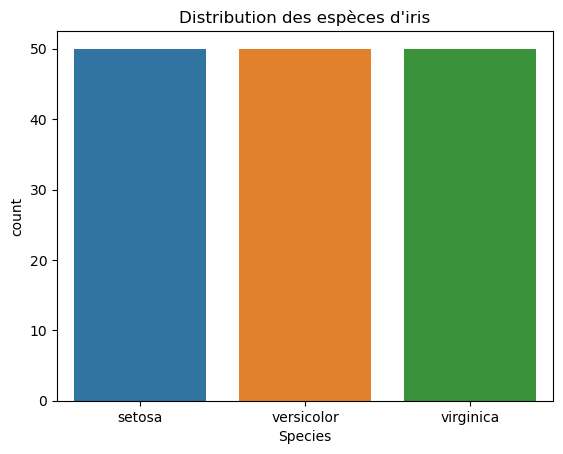

In [3]:
# Visualisation de la répartition des classes
sns.countplot(x='Species', data=df)
plt.title('Distribution des espèces d\'iris')
plt.show()


In [4]:
#Affiche la taille du jeu de donnees: nbligne colonne
df.shape

(150, 5)

In [5]:
df.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')

In [6]:
classe = df.columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
#EXERCICE1
#question1:Afficher l'effectif de chacune des 3 modalités
effectif=df['Species'].value_counts()
effectif

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

<Axes: >

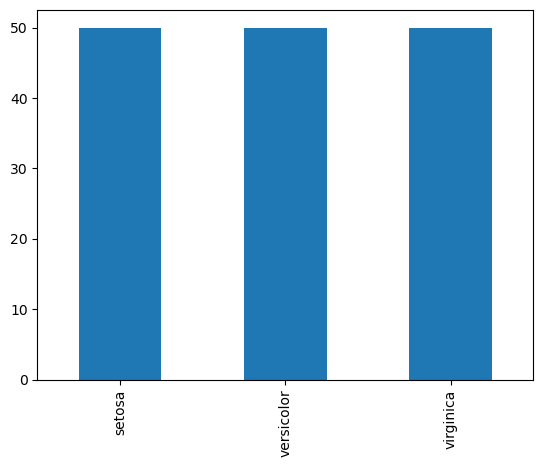

In [9]:
#question2
#Tracer les diagrammes de ces effectifs sous forme de:
#a- histogramme;
df['Species'].value_counts().plot(kind='bar')

In [10]:
classe

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')

<Axes: ylabel='Species'>

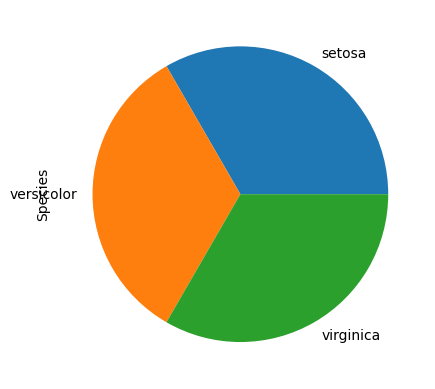

In [11]:
#question2
#Tracer les diagrammes de ces effectifs sous forme de:
#a- secteurs;
effectf= df['Species'].value_counts()
effectif.plot(kind='pie')


<BarContainer object of 3 artists>

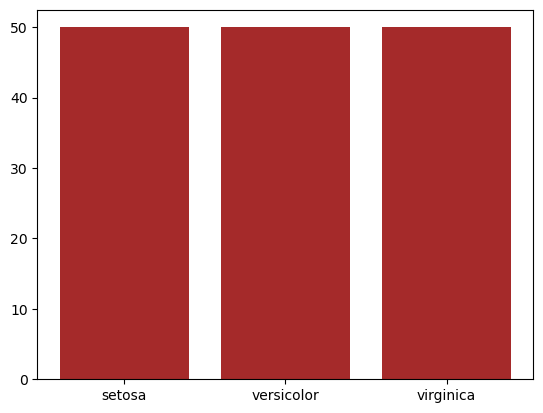

In [12]:
#question2
#Tracer les diagrammes de ces effectifs sous forme de:
#barres groupees
plt.bar(effectif.index, effectif, width=0.8, color='brown')
    

In [13]:
effectif.cumsum()

setosa         50
versicolor    100
virginica     150
Name: Species, dtype: int64

<BarContainer object of 3 artists>

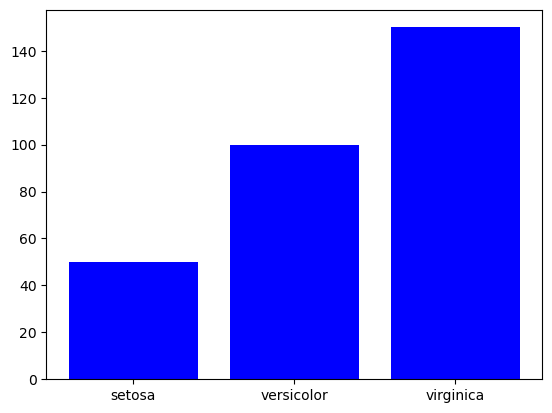

In [14]:
#question2
#Tracer les diagrammes de ces effectifs sous forme de:
#cascade
plt.bar(effectif.cumsum().index, effectif.cumsum(), color='blue')

In [15]:
#Exercice2 question1
#resume de l'information contenue dans le petal
df['PetalLength'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 150 entries, 0 to 149
Series name: PetalLength
Non-Null Count  Dtype  
--------------  -----  
150 non-null    float64
dtypes: float64(1)
memory usage: 1.3 KB


<Axes: xlabel='PetalLength', ylabel='Count'>

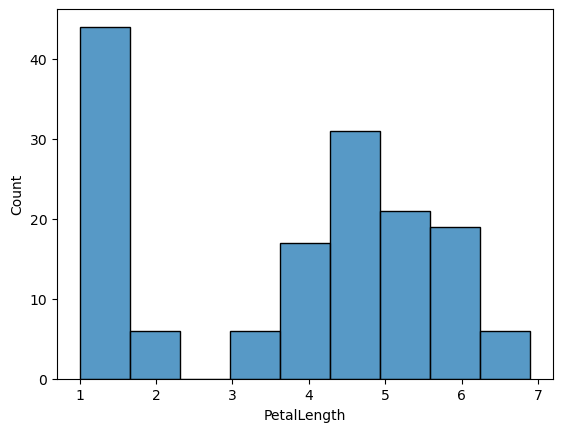

In [16]:
#Exercice2 question2
sns.histplot(df['PetalLength'], kde=False)

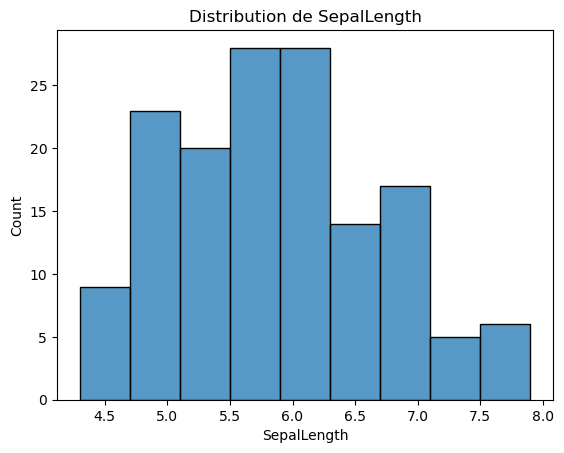

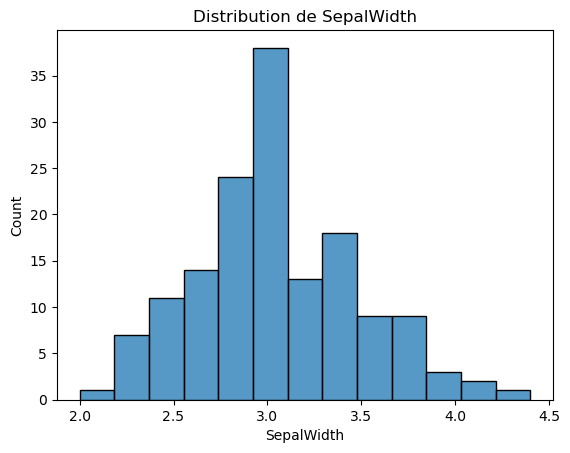

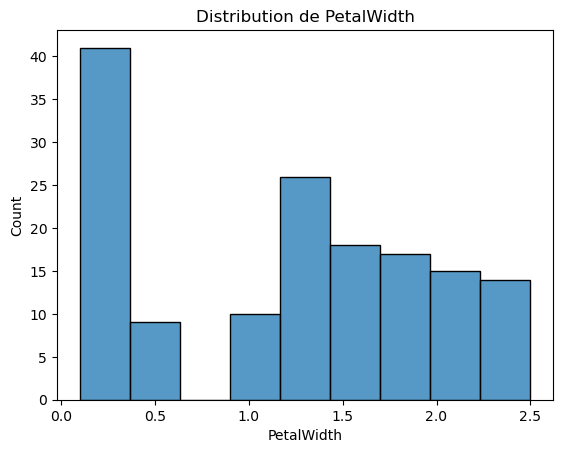

In [17]:
#Exercice2 question3
import numpy as np
for col in np.take(np.array(classe),[0,1,3]):
    sns.histplot(df[col], kde=False)
    plt.title(f'Distribution de {col}')
    plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

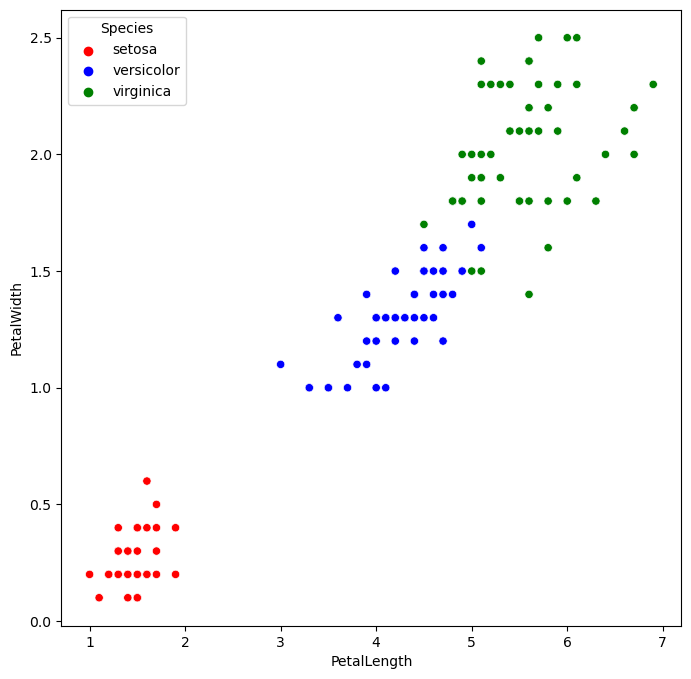

In [18]:
#Exercice 3 question 1

plt.figure(figsize=(8,8))
sns.scatterplot(data=df,x='PetalLength',y='PetalWidth', hue='Species', palette=['red','blue','green'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

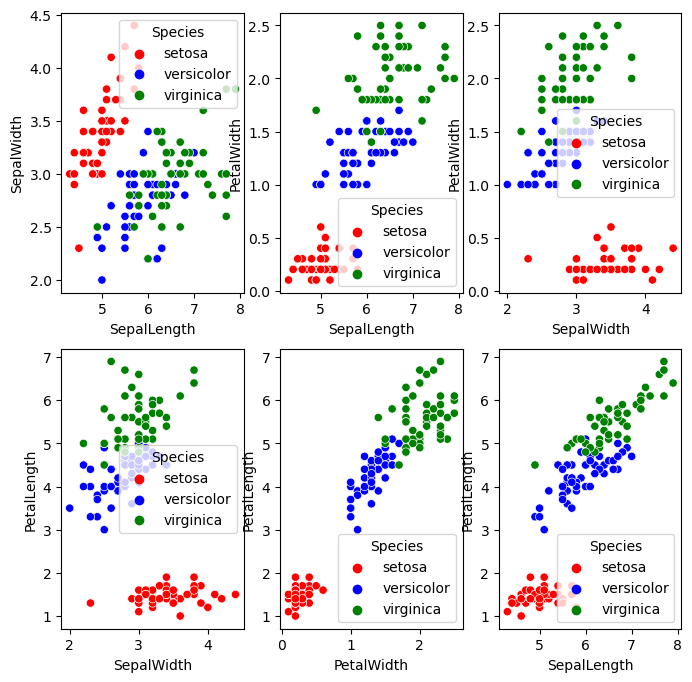

In [19]:
#Exercice 3 question 2

plt.figure(figsize=(8,8))

plt.subplot(231)
sns.scatterplot(data=df,x='SepalLength',y='SepalWidth', hue='Species', palette=['red','blue','green'])
plt.subplot(232)
sns.scatterplot(data=df,x='SepalLength',y='PetalWidth', hue='Species', palette=['red','blue','green'])
plt.subplot(233)
sns.scatterplot(data=df,x='SepalWidth',y='PetalWidth', hue='Species', palette=['red','blue','green'])
plt.subplot(234)
sns.scatterplot(data=df,x='SepalWidth',y='PetalLength', hue='Species', palette=['red','blue','green'])
plt.subplot(235)
sns.scatterplot(data=df,x='PetalWidth',y='PetalLength', hue='Species', palette=['red','blue','green'])
plt.subplot(236)
sns.scatterplot(data=df,x='SepalLength',y='PetalLength', hue='Species', palette=['red','blue','green'])

plt.show

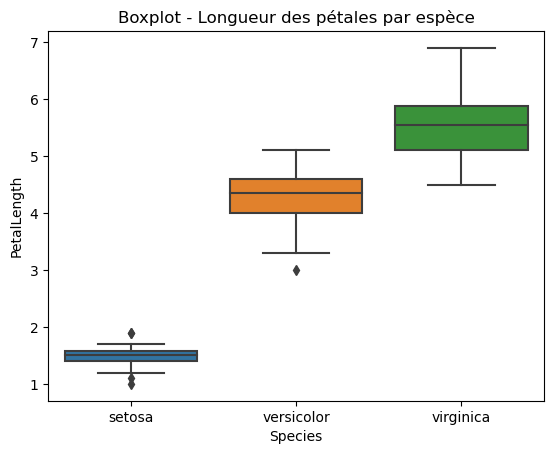

In [20]:
#Exercice 4
#question1 :Représentons par exemple la longueur des pétales en fonction de l’espèce (Species).
sns.boxplot(x='Species', y='PetalLength', data=df)
plt.title('Boxplot - Longueur des pétales par espèce')
plt.show()
#La longueur du petal de l'espece virginica est plus elevee

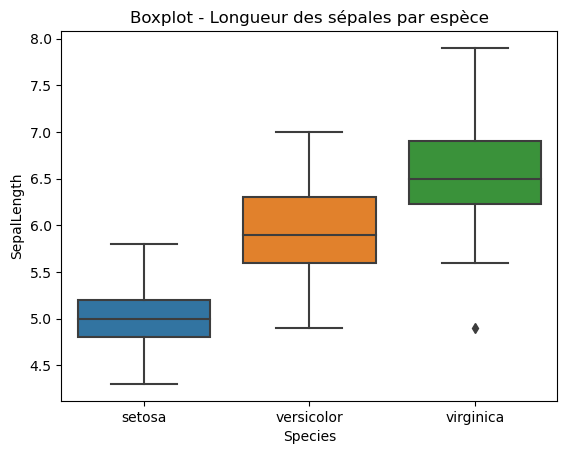

In [21]:
#Exercice 4
#question2 :Choisissez une autre variable quantitative, croisez-la avec la variable espèce (Species) d’iris 
sns.boxplot(x='Species', y='SepalLength', data=df)
plt.title('Boxplot - Longueur des sépales par espèce')
plt.show()
#La longueur du Sepal de l'espece virginica est plus elevee

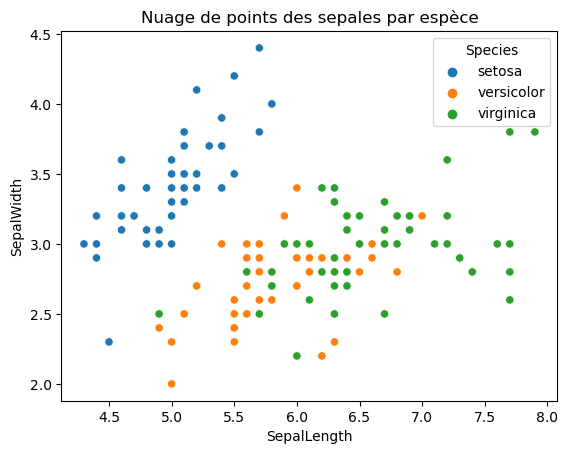

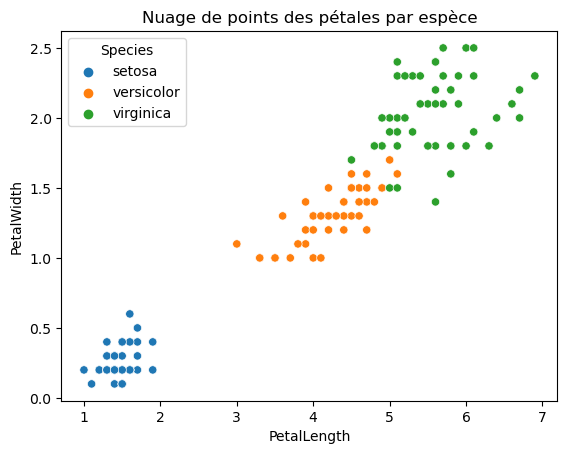

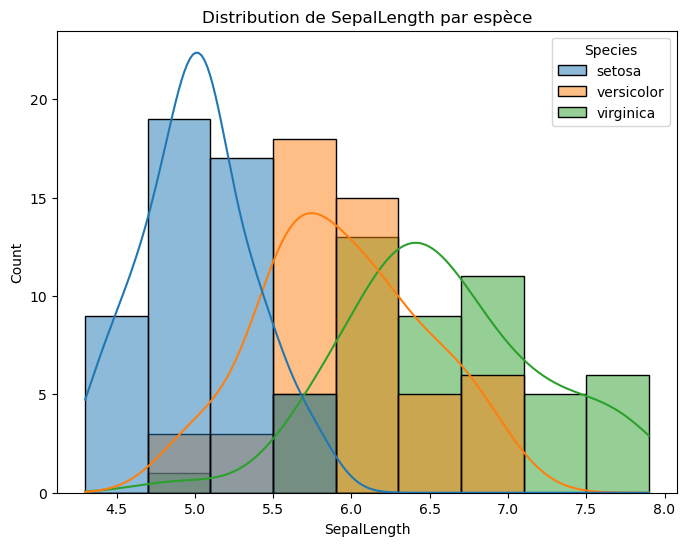

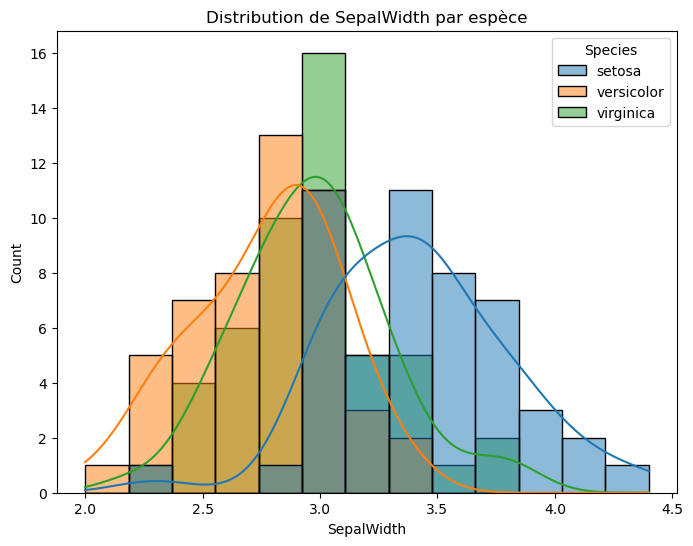

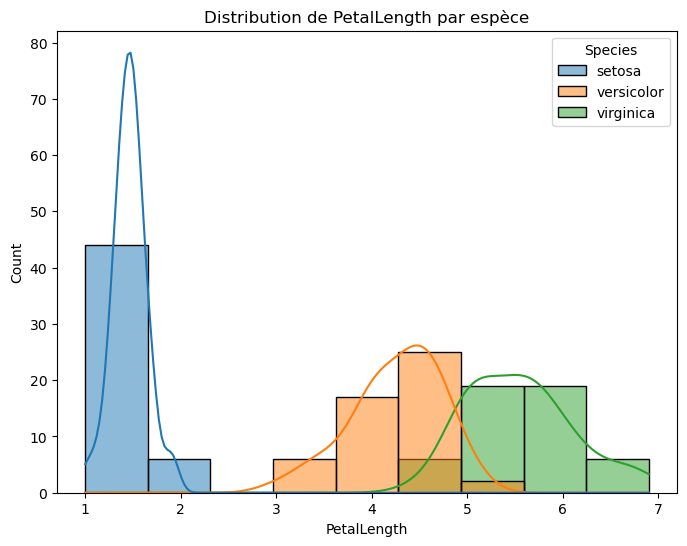

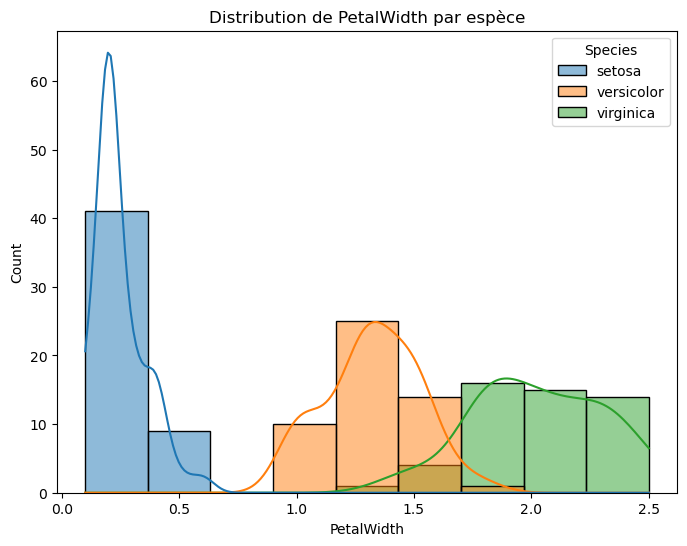

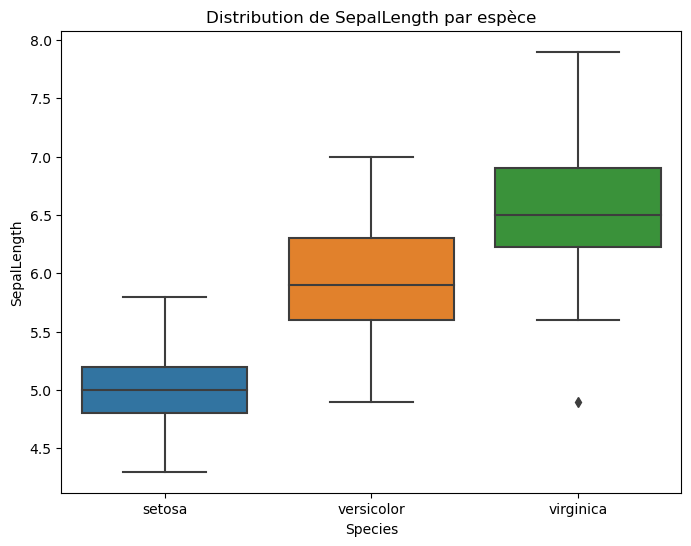

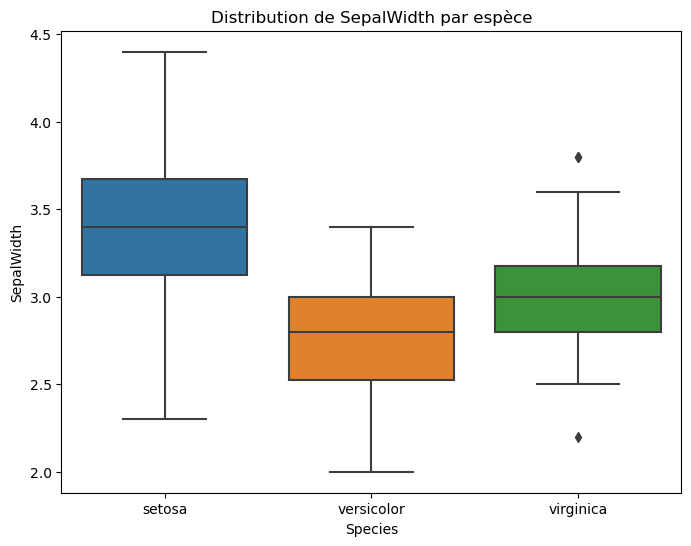

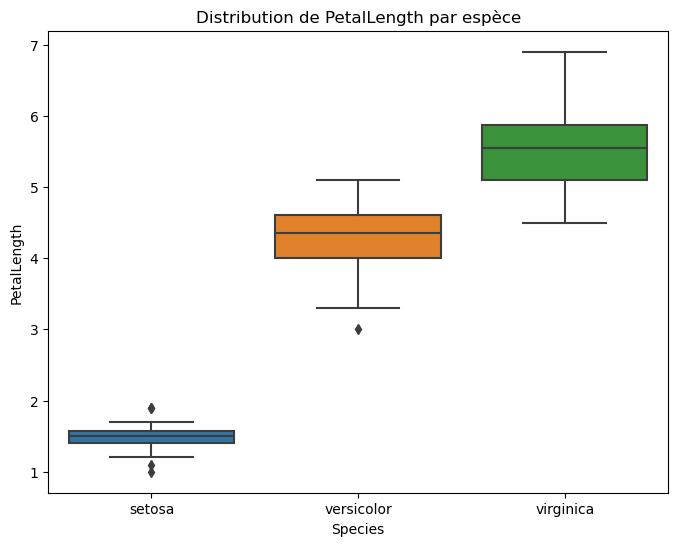

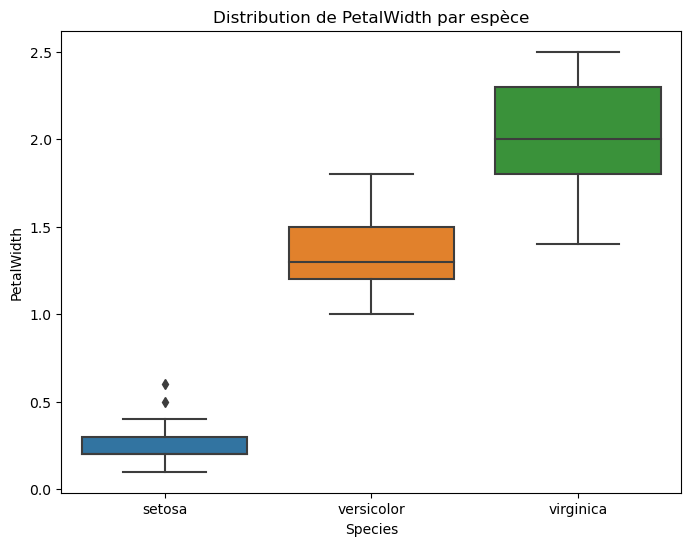

In [22]:
#Exercice5
#question1: Nuage de points des sépales par espèce
sns.scatterplot(x='SepalLength', y='SepalWidth', hue='Species', data=df)
plt.title('Nuage de points des sepales par espèce')
plt.show()


#Nuage de points des pétales par espèce pour d'autres variables
sns.scatterplot(x='PetalLength', y='PetalWidth', hue='Species', data=df)
plt.title('Nuage de points des pétales par espèce')
plt.show()


# histogrammes par espèce

for col in df.columns[:-1]:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='Species', kde=True)
    plt.title(f'Distribution de {col} par espèce')
    plt.show()

# boxplots par espèce

for col in df.columns[:-1]:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='Species', y=col)
    plt.title(f'Distribution de {col} par espèce')
    plt.show()

Matrice de corrélation:
              SepalLength  SepalWidth  PetalLength  PetalWidth
SepalLength     1.000000   -0.109369     0.871754    0.817954
SepalWidth     -0.109369    1.000000    -0.420516   -0.356544
PetalLength     0.871754   -0.420516     1.000000    0.962757
PetalWidth      0.817954   -0.356544     0.962757    1.000000


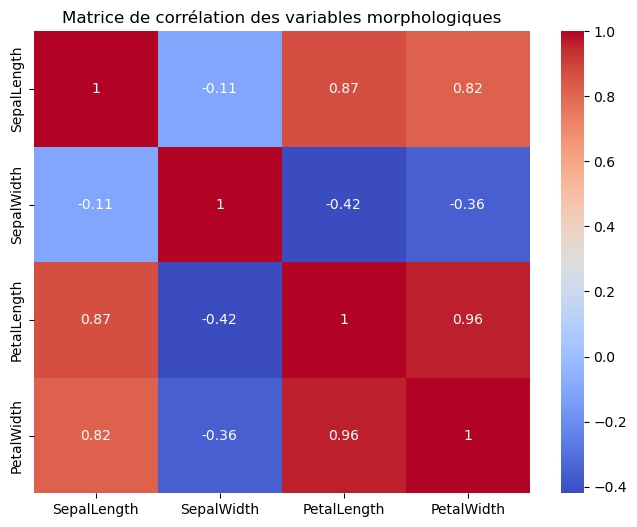

In [23]:
#question2: Matrice de corrélation
correlation_matrix = df.corr(numeric_only=True)
print("Matrice de corrélation:\n",correlation_matrix)
# Visualisation de la matrice de corrélation avec une heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation des variables morphologiques')
plt.show()

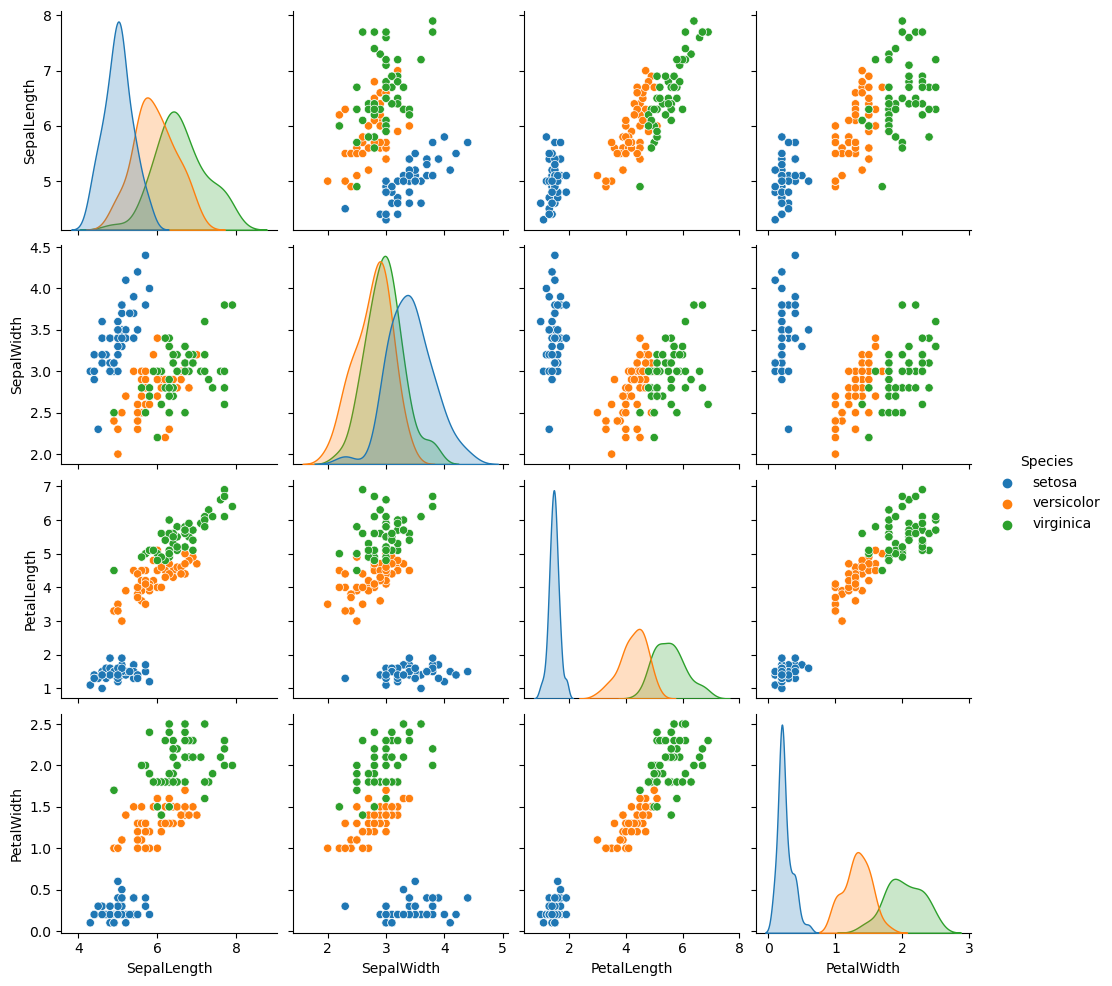

In [24]:
#question3: autres representations
# Pair plots avec couleur par espèce
sns.pairplot(df, hue='Species')
plt.show()

In [25]:
#ETAPE 3: PREPARER LES DONNEES POUR LE MODELE

# Séparer les caractéristiques et la cible
X = df.drop('Species', axis=1)
y = df['Species']

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
                                            
# Normaliser les caractéristiques
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
#Étape 4 : Créer et entraîner un modèle de classification (K-Nearest Neighbors)

# Créer le modèle KNN
knn = KNeighborsClassifier(n_neighbors=3)

# Entraîner le modèle
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
#Étape 5 : Évaluer le modèle

# Prédire les classes de l'ensemble de test
y_pred = knn.predict(X_test)

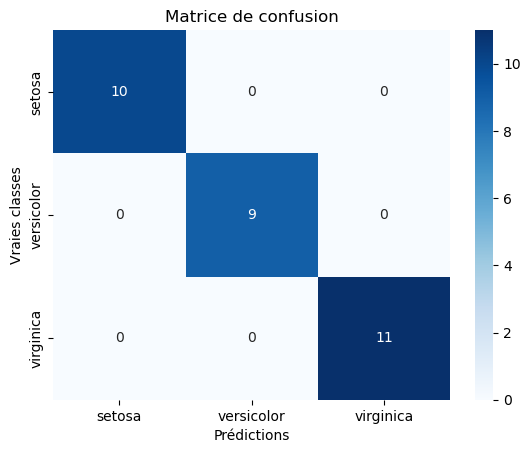

In [28]:
# Afficher la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred) #Necessite l'import: from sklearn.metrics import confusion_matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=df['Species'].unique(), yticklabels=df['Species'].unique())
plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies classes')
plt.show()

In [29]:
# Calculer l'exactitude
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitude du modèle : {accuracy * 100:.2f}%") #Necessite l'import: from sklearn.metrics import accuracy_score


Exactitude du modèle : 100.00%


In [30]:
# Afficher le rapport de classification
print("Rapport de classification :\n", classification_report(y_test, y_pred)) # Necessite l'import: from sklearn.metrics import classification_report


Rapport de classification :
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



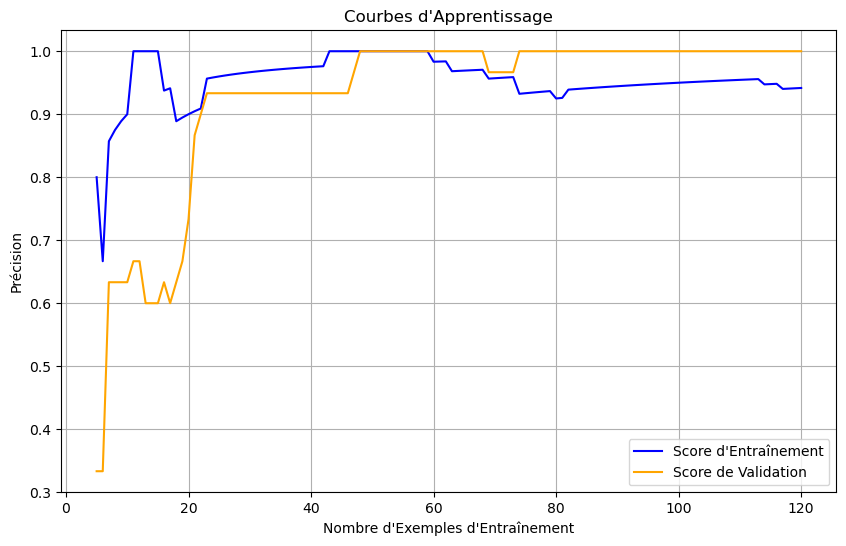

In [31]:
# Entraîner le modèle et enregistrer les scores
train_scores = []
val_scores = []

# Entraînement en utilisant la validation croisée
for i in range(5, len(X_train) + 1):  # Entraîner avec de plus en plus d'exemples
    knn.fit(X_train[:i], y_train[:i])  # Entraîner sur les premiers i exemples
    
    # Prédictions
    y_train_pred = knn.predict(X_train[:i])
    y_val_pred = knn.predict(X_test)
    
    # Calculer les scores
    train_scores.append(accuracy_score(y_train[:i], y_train_pred))
    val_scores.append(accuracy_score(y_test, y_val_pred))

# Tracer les courbes d'apprentissage
plt.figure(figsize=(10, 6))
plt.plot(range(5, len(X_train) + 1), train_scores, label='Score d\'Entraînement', color='blue')
plt.plot(range(5, len(X_train) + 1), val_scores, label='Score de Validation', color='orange')
plt.title('Courbes d\'Apprentissage')
plt.xlabel('Nombre d\'Exemples d\'Entraînement')
plt.ylabel('Précision')
plt.legend()
plt.grid()
plt.show()

In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [33]:
lr.fit(X_train, y_train)

LogisticRegression()

In [34]:
y_pred =lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Le score est:", accuracy)

Le score est: 1.0


In [35]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred= dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Le score est:", accuracy)

Le score est: 1.0


In [ ]:
import joblib
joblib.dump(dt,'mon_model.pkl')
joblib.dump(scaler,'mon_scaler.pkl')

['mon_scaler.pkl']

In [ ]:
import joblib
joblib.dump(dt,'mon_model.pkl')
joblib.dump(scaler,'mon_scaler.pkl')

['mon_scaler.pkl']

In [37]:
import sklearn
print(sklearn.__version__)

1.2.1
